In [1]:
# This module runs the linear regression analysis
# Database "student-mat.csv" is used as the training set

import my_functions as mf
import pandas as pd
import numpy as np
pd.set_option('mode.chained_assignment', None)  # To turn off SettingWithCopyWarning
np.set_printoptions(formatter={'float': lambda x: "{0:0.3f}".format(x)})  # To print the predicted w to 3 decimals places

In [2]:
# In order to train the model to predict final grade in Math, student-mat.csv is loaded
x, y = mf.load_data("data/student-mat.csv")

In [3]:
x

,school,sex,age,Mjob,Fjob,higher,activities,G1,G2
0,GP,F,18,at_home,teacher,yes,no,5,6
1,GP,F,17,at_home,other,yes,no,5,5
2,GP,F,15,at_home,other,yes,no,7,8
3,GP,F,15,health,services,yes,yes,15,14
4,GP,F,16,other,other,yes,no,6,10
...,...,...,...,...,...,...,...,...,...
390,MS,M,20,services,services,yes,no,9,9
391,MS,M,17,services,services,yes,no,14,16
392,MS,M,21,other,other,yes,no,10,8
393,MS,M,18,services,other,yes,no,11,12


In [4]:
y

0       6
1       6
2      10
3      15
4      10
       ..
390     9
391    16
392     7
393    10
394     9
Name: G3, Length: 395, dtype: int64

In [5]:
# Training set x is exposed to dummy_matrices() in order to convert all categorical features with dummy matrices
x_dummy = mf.dummy_matrices(x)

In [6]:
x_dummy

,school,sex,age,higher,activities,G1,G2,m_at_home,m_health,m_other,m_services,m_teacher,f_at_home,f_health,f_other,f_services,f_teacher
0,0,0,18,1,0,5,6,1,0,0,0,0,0,0,0,0,1
1,0,0,17,1,0,5,5,1,0,0,0,0,0,0,1,0,0
2,0,0,15,1,0,7,8,1,0,0,0,0,0,0,1,0,0
3,0,0,15,1,1,15,14,0,1,0,0,0,0,0,0,1,0
4,0,0,16,1,0,6,10,0,0,1,0,0,0,0,1,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
390,1,1,20,1,0,9,9,0,0,0,1,0,0,0,0,1,0
391,1,1,17,1,0,14,16,0,0,0,1,0,0,0,0,1,0
392,1,1,21,1,0,10,8,0,0,1,0,0,0,0,1,0,0
393,1,1,18,1,0,11,12,0,0,0,1,0,0,0,1,0,0


In [8]:
w, b, r_sq = mf.compute_model(x_dummy, y)

# Printing predicted w, b and r_sq to 3 decimal places
print("Predicted w: ", w, "\n")
print("Predicted b: ", "%.3f" % b, "\n")
print("Coefficient of determination: ", "%.3f" % r_sq, "\n")

Predicted w:  [0.301 0.244 -0.167 0.637 -0.384 0.183 0.946 -0.306 0.047 -0.050 0.226
 0.084 -0.249 0.406 0.244 -0.185 -0.216] 

Predicted b:  0.450 

Coefficient of determination:  0.828 



In [9]:
new_st_name = input("Please write the new student's name: ")
new_st = mf.new_student(x)

new_st_dummy = mf.dummy_matrix_of_new_student(new_st, x)

Please write the new student's name: Lorenzo
Please write the school of a student (['GP' 'MS']): GP
Please write the sex of a student (['F' 'M']): M
Please write the age of a student (from 15 to 25): 23
Please write the Mjob of a student (['at_home' 'health' 'other' 'services' 'teacher']): health
Please write the Fjob of a student (['teacher' 'other' 'services' 'health' 'at_home']): teacher
Please write the higher of a student (['yes' 'no']): yes
Please write the activities of a student (['no' 'yes']): yes
Please write the G1 of a student (from 0 to 20): 17
Please write the G2 of a student (from 0 to 20): 18


In [10]:
y_pred = mf.predict(new_st_dummy, w, b)

print("The predicted G3 for " + new_st_name + "  is : ", "%.3f" % y_pred)

The predicted G3 for Lorenzo  is :  17.088


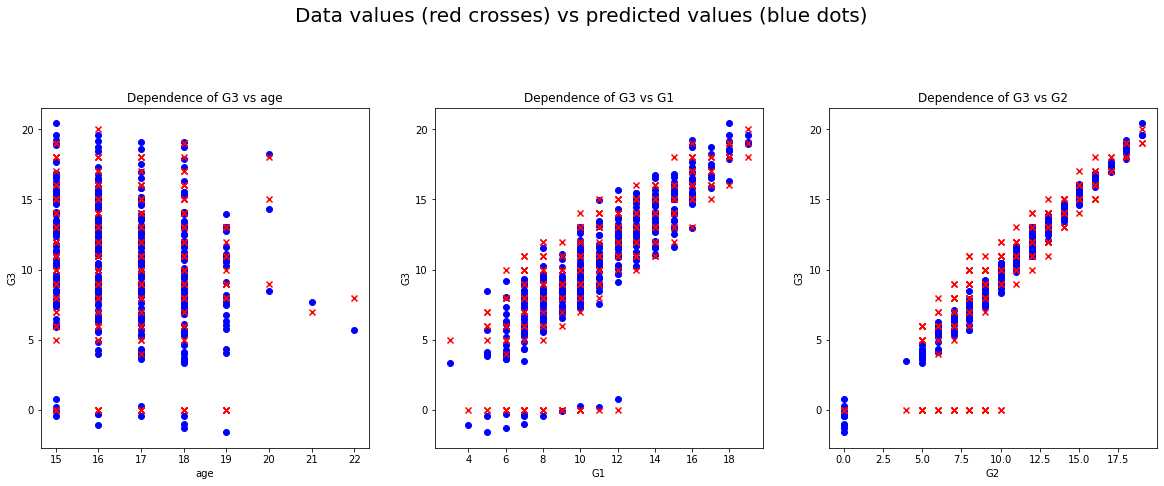

In [11]:
mf.plot(x, y, w, b)